In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

### Sigmoid Example - Feeding inputs with a Placeholder
Here we calculate the sigmoid example by feeding in inputs with a placeholder

In [2]:

# Defining the graph and session
graph = tf.Graph() # Create a graph
session = tf.InteractiveSession(graph=graph)  # Create a session

# Building the graph
# A placeholder is an symbolic input
# 輸入端 1排10列，計 10 單元input
x = tf.placeholder(shape=[1,10], dtype=tf.float32, name='x')
# Variable 產生值 -0.1 到 0.1 shape形狀的矩陣
W = tf.Variable(tf.random_uniform(shape=[10,5], minval=-0.1, maxval=0.1,
                                  dtype=tf.float32), name='W')
b = tf.Variable(tf.zeros(shape=[5], dtype=tf.float32), name='b')
h = tf.nn.sigmoid(tf.matmul(x,W) + b)

# Executing operations and evaluating nodes in the graph
tf.global_variables_initializer().run() # Initialize the variables

# Run the operation by providing a value to the symbolic input x
h_eval = session.run(h, feed_dict={x:np.random.rand(1,10)})
print(h_eval)
session.close() # Frees all the resources associated with the session


[[0.51595825 0.4868434  0.4719593  0.48035872 0.5005524 ]]


### Feeding inputs as Tensorflow tensors
Now we make the same calculations with the input as an immutable tensor

In [3]:
graph = tf.Graph()
session = tf.InteractiveSession(graph=graph)
x = tf.constant(value=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]],
                dtype=tf.float32, name='x')
W = tf.Variable(tf.random_uniform(shape=[10,5], minval=-0.1, maxval=0.1,
                                  dtype=tf.float32), name='W')
b = tf.Variable(tf.zeros(shape=[5], dtype=tf.float32), name='b')
h = tf.nn.sigmoid(tf.matmul(x, W) + b)
tf.global_variables_initializer().run()
h_eval = session.run(h)
print(h_eval)
session.close()

[[0.49852136 0.4388183  0.5270245  0.48131537 0.48581406]]


### Creating a Tensorflow Data Pipeline
We now create a data pipleline to read inputs. 
Data pipeline is an efficient way of reading data when you have to read lots of data stored externally.

In [4]:
graph = tf.Graph()
session = tf.InteractiveSession(graph=graph)
filenames = ['test%d.txt' %i for i in range(1,4)]
filename_queue = tf.train.string_input_producer(filenames,
                    capacity=3, shuffle=True, name='string_input_producer')
for f in filenames:
    if not tf.gfile.Exists(f):
        raise ValueError('Failed to find file: ' + f)
    else:
        print('File %s found' %f)
        
# Reader which takes a filename queue and 
# read() which outputs data one by one
reader = tf.TextLineReader()

# ready the data of the file and output as key,value pairs 
# We're discarding the key
key, value = reader.read(filename_queue, name='text_read_op')

# if any problems encountered with reading file 
# this is the value returned
record_defaults = [[-1.0], [-1.0], [-1.0], [-1.0], [-1.0],
                   [-1.0], [-1.0], [-1.0], [-1.0], [-1.0]]
# decoding the read value to columns
col1, col2, col3, col4, col5, col6, col7, col8, col9, col10 = \
    tf.decode_csv(value, record_defaults=record_defaults)
features = tf.stack([col1, col2, col3, col4, col5, col6, col7, col8, col9, col10])

# output x is randomly assigned a batch of data of batch_size 
# where the data is read from the txt files
x = tf.train.shuffle_batch([features], batch_size=3, capacity=5,
                          name='data_batch',min_after_dequeue=1, num_threads=1)
# QueueRunner retrieve data from queues and we need to explicitly start them
# Coordinator coordinates multiple QueueRunners
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, sess=session)

# Building the graph by defining the variables and calculations
W = tf.Variable(tf.random_uniform(shape=[10,5], minval=-0.1, maxval=0.1,
                                 dtype=tf.float32), name='W')
b = tf.Variable(tf.zeros(shape=[5], dtype=tf.float32), name='b')
h = tf.nn.sigmoid(tf.matmul(x, W) + b)
tf.global_variables_initializer().run()

for step in range(5):
    x_eval, h_eval = session.run([x,h])
    print('========= Step %d ==========' % step)
    print('Evaluated data (x)')
    print(x_eval)
    print('Evaluated data (h)')
    print(h_eval)
    
# We also need to explicitly stop the coordinator 
# otherwise the process will hang indefinitely
coord.request_stop()
coord.join(threads)
session.close()

File test1.txt found
File test2.txt found
File test3.txt found
========= Step 0 ==========
Evaluated data (x)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Evaluated data (h)
[[0.4947481  0.4986956  0.50661415 0.5034177  0.501618  ]
 [0.4947481  0.4986956  0.50661415 0.5034177  0.501618  ]
 [0.4947481  0.4986956  0.50661415 0.5034177  0.501618  ]]
========= Step 1 ==========
Evaluated data (x)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]]
Evaluated data (h)
[[0.4947481  0.4986956  0.50661415 0.5034177  0.501618  ]
 [0.4947481  0.4986956  0.50661415 0.5034177  0.501618  ]
 [0.47926095 0.488772   0.557588   0.51357424 0.4979254 ]]
========= Step 2 ==========
Evaluated data (x)
[[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
 [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
 [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]]
Evaluated data (h)

### Comparison Operators
Here we discuss some operators that allows us to compare two tensors element-wise

In [5]:
graph = tf.Graph()
session = tf.InteractiveSession(graph=graph)
x = tf.constant([[1,2],[3,4]], dtype=tf.int32)
y = tf.constant([[4,3],[3,2]], dtype=tf.int32)
# Checks if two tensors are equal element-wise and returns a boolean tensor
# x_equal_y => [[False,False],[True,False]]
x_equal_y = tf.equal(x, y, name=None) 

# Checks if x is less than y element-wise and returns a boolean tensor
# x_less_y => [[True,True],[True,False]]
x_less_y = tf.less(x, y, name=None) 

# Checks if x is greater or equal than y element-wise and returns a boolean tensor
# x_great_equal_y => [[False,False],[True,True]]
x_great_equal_y = tf.greater_equal(x, y, name=None) 

# Selects elements from x and y depending on whether,
# the condition is satisfied (select elements from x)
# or the condition failed (select elements from y)
condition = tf.constant([[True,False],[True,False]],dtype=tf.bool)
# x_cond_y => [[1,3],[3,2]]
x_cond_y = tf.where(condition, x, y, name=None) 

print('Is X == Y (element-wise)?')
print(session.run(x_equal_y))

print('\nIs X < Y (element-wise)?')
print(session.run(x_less_y))

print('\nIs X >= Y (element-wise)?')
print(session.run(x_great_equal_y))

print('\nX or Y depending on the condition (element-wise)')
print(session.run(x_cond_y))

session.close()

Is X == Y (element-wise)?
[[False False]
 [ True False]]

Is X < Y (element-wise)?
[[ True  True]
 [False False]]

Is X >= Y (element-wise)?
[[False False]
 [ True  True]]

X or Y depending on the condition (element-wise)
[[1 3]
 [3 2]]


### Scatter and Gather Operations
Scatter operation can distributed a set of values to specific positions of a tensor, where the gather operation can obtain a slice of a tensor specified by a set of indices.

In [6]:
graph = tf.Graph()
session = tf.InteractiveSession(graph=graph)
# 1-D scatter operation
ref = tf.Variable(tf.constant([1,9,3,10,5], dtype=tf.float32),
                  name='scatter_update')
indices = [1,3]
updates = tf.constant([2,4], dtype=tf.float32)
tf_scatter_update = tf.scatter_update(ref, indices, updates, use_locking=None,
                                      name=None)
tf.global_variables_initializer().run()
print('\nScatter Operation for 1-D')
print(session.run(tf_scatter_update))

# n-D scatter operation
indices = [[1],[3]] 
updates = tf.constant([[1,1,1],[2,2,2]])
shape = [4,3]
tf_scatter_nd_1 = tf.scatter_nd(indices, updates, shape, name=None)
print('\nScatter Operation for n-D')
print(session.run(tf_scatter_nd_1))

# n_D scatter operation
indices = [[1,0],[3,1]] # 2 X 2
updates = tf.constant([1,2]) # 2 X 1
shape = [4,3] # 2
tf_scatter_nd_2 = tf.scatter_nd(indices, updates, shape, name=None)
print('\nScatter Operation for n-D')
print(session.run(tf_scatter_nd_2))

# 1-D gather operation
params = tf.constant([1,2,3,4,5], dtype=tf.float32)
indices = [1,4]
# tf_gather => [2,5]
tf_gather = tf.gather(params, indices, validate_indices=True, name=None)
print('\nGather Operation for n-D')
print(session.run(tf_gather))

params = tf.constant([[0,0,0],[1,1,1],[2,2,2],[3,3,3]], dtype=tf.float32)
indices = [[0],[2]]
# tf_gather_nd_2 => [[0,0,0],[2,2,2]]
tf_gather_nd = tf.gather_nd(params, indices, name=None)
print('\nGather Operation for n-D')
print(session.run(tf_gather_nd))

params = tf.constant([[0,0,0],[1,1,1],[2,2,2],[3,3,3]],dtype=tf.float32)
indices = [[0,1],[2,2]]
# tf_gather_nd_2 => [[0,0,0],[2,2,2]]
tf_gather_nd_2 = tf.gather_nd(params, indices, name=None)
print('\nGather Operation for n-D')
print(session.run(tf_gather_nd_2))


session.close()


Scatter Operation for 1-D
[1. 2. 3. 4. 5.]

Scatter Operation for n-D
[[0 0 0]
 [1 1 1]
 [0 0 0]
 [2 2 2]]

Scatter Operation for n-D
[[0 0 0]
 [1 0 0]
 [0 0 0]
 [0 2 0]]

Gather Operation for n-D
[2. 5.]

Gather Operation for n-D
[[0. 0. 0.]
 [2. 2. 2.]]

Gather Operation for n-D
[0. 2.]


### 2-Dimensional Operations (2D Convolution and 2D Max pooling)
2D Convolution and Max pooling are two operation you perform on a tensor over the width and height axes. These operations are often used in convolution neural networks.

In [7]:
graph = tf.Graph()
session = tf.InteractiveSession(graph=graph)

x = tf.constant(
    [[
        [[1],[2],[3],[4]],
        [[4],[3],[2],[1]],
        [[5],[6],[7],[8]],
        [[8],[7],[6],[5]]
    ]],
    dtype=tf.float32)

x_filter = tf.constant(
    [
        [
            [[0.5]],[[1]]
        ],
        [
            [[0.5]],[[1]]
        ]
    ],
    dtype=tf.float32)

x_stride = [1,1,1,1]
x_padding = 'VALID'

x_conv = tf.nn.conv2d(
    input=x, filter=x_filter,
    strides=x_stride, padding=x_padding
)
print('\n2-D Convolution operation')
print(session.run(x_conv))

x = tf.constant(
    [[
        [[1],[2],[3],[4]],
        [[4],[3],[2],[1]],
        [[5],[6],[7],[8]],
        [[8],[7],[6],[5]]
    ]],
    dtype=tf.float32)

x_ksize = [1,2,2,1]
x_stride = [1,2,2,1]
x_padding = 'VALID'

x_pool = tf.nn.max_pool(
    value=x, ksize=x_ksize,
    strides=x_stride, padding=x_padding
)

print('\nMax pooling operation')
print(session.run(x_pool))
session.close()


2-D Convolution operation
[[[[ 7.5]
   [ 7.5]
   [ 7.5]]

  [[13.5]
   [13.5]
   [13.5]]

  [[19.5]
   [19.5]
   [19.5]]]]

Max pooling operation
[[[[4.]
   [4.]]

  [[8.]
   [8.]]]]


## Loss Functions
Here we define several well-known loss functions that are commonly used in optimizing neural networks.
1. Mean Squared Error (MSE)
 * $MSE = (1/N)\sum_{i=1}^{N} {(x_i-\hat{x}_i)}^2$
 
2. Cross Entropy Loss (CE)
 * $CE = -(1/N)\sum_{i=1}^{N}y_ilog(\hat{y}_i) + (1-y_i)log(1-\hat{y}_i)$

In [8]:
# Defining the graph and session
graph = tf.Graph() # Creates a graph
session = tf.InteractiveSession(graph=graph) # Creates a session

# Returns half of L2 norm of t given by sum(t**2)/2
x = tf.constant([[2,4],[6,8]],dtype=tf.float32)
x_hat = tf.constant([[1,2],[3,4]],dtype=tf.float32)
# MSE = (1**2 + 2**2 + 3**2 + 4**2)/2 = 15
MSE = tf.nn.l2_loss(x-x_hat)

# A common loss function used in neural networks to optimize the network
# Calculating the cross_entropy with logits (unnormalized outputs of the last layer)
# instead of outputs leads to better numerical stabilities

y = tf.constant([[1,0],[0,1]],dtype=tf.float32)
y_hat = tf.constant([[3,1],[2,5]],dtype=tf.float32)
# This function alone doesnt average the cross entropy losses of all data points,
# You need to do that manually using reduce_mean function
CE = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat,labels=y))

print('MSE Loss: ',session.run(MSE))
print('CE Loss: ',session.run(CE))
session.close()

MSE Loss:  15.0
CE Loss:  0.08775769


### Stochastic Optimization
Here we discuss how to implement optimization with TensorFlow. The objective of this example is to find the mininum point of a given function. For this example, we will use a simple quadratic function where $y = x^2$. We will start at an arbitrary point (say $x=2$) and keep minimizing $y$ until we reach the minimum $y$.

StepL  0 ,x:  1.6 , y:  4.0
StepL  1 ,x:  1.28 , y:  2.5600002
StepL  2 ,x:  1.0239999 , y:  1.6384
StepL  3 ,x:  0.8191999 , y:  1.0485759
StepL  4 ,x:  0.6553599 , y:  0.6710885


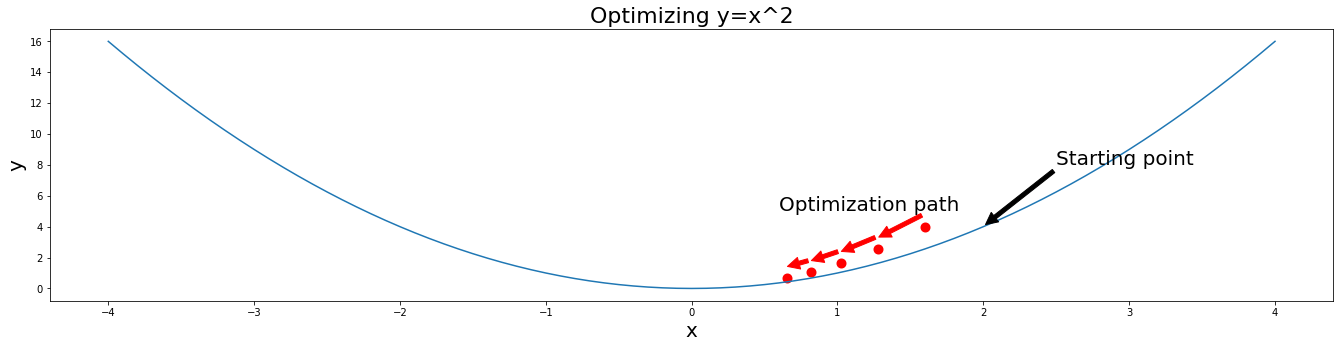

In [9]:
graph = tf.Graph()
session = tf.InteractiveSession(graph=graph)
tf_x = tf.Variable(tf.constant(2.0, dtype=tf.float32), name='x')
tf_y = tf_x ** 2
minimize_op = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(tf_y)

x_series, y_series = [],[]
tf.global_variables_initializer().run()
for step in range(5):
    _, x, y = session.run([minimize_op, tf_x, tf_y])
    print('StepL ', step, ',x: ', x, ', y: ',y)
    x_series.append(x)
    y_series.append(y)
    
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(w=23, h=5)
ax.plot(np.arange(-4, 4.1, 0.1), np.arange(-4, 4.1, 0.1) ** 2)
ax.scatter(x_series, y_series, c='red', linewidths=4)

x_offset, y_offset = 0.02, 0.75
ax.annotate('Starting point', xy=(2.01, 4.1), xytext=(2.5, 8),
            arrowprops=dict(facecolor='black', shrink=0.01), fontsize=20)
ax.annotate('Optimization path', xy=(2.01, 4.1), xytext=(0.6,5),
            arrowprops=None, fontsize=20)
for index, (x,y) in enumerate(zip(x_series, y_series)):
    if index == len(x_series) -1:
        break
    ax.annotate('', xy=(x_series[index+1], y_series[index+1]+y_offset),
                xytext=(x-x_offset, y+y_offset),
                arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.01),
                fontsize=20)

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_title('Optimizing y=x^2', fontsize=22)
fig.savefig('optimization.jpg')
session.close()


### Using tf.control_dependencies(...) Operation

In [10]:
# if you don't pass a graph, the default_graph will be used by
# TensorFlow as the graph
session = tf.InteractiveSession()

x = tf.Variable(tf.constant(2.0), name='x')
x_assign_op = tf.assign(x, x+5)
z = x*2

tf.global_variables_initializer().run()

print('z=',session.run(z))
print('x=',session.run(x))

session.close()

z= 4.0
x= 2.0


### Variable Scoping
Here we will see how we can use variable scoping to reuse variables during the execution of the code. First we will see that TensorFlow creates variables everytime we execute code if scoping is not used. Then we look at how to solve this issue with scoping.

In [11]:
#graph = tf.Graph()
# Defining the graph and session
session = tf.InteractiveSession() # Creates a session with default graph

def very_simple_computation(w):
  x = tf.Variable(tf.constant(5.0, shape=None, dtype=tf.float32), name='x')
  y = tf.Variable(tf.constant(2.0, shape=None, dtype=tf.float32), name='y')
  z = x*w + y**2
  return z

z1 = very_simple_computation(2)

for _ in range(10):
    z1 = very_simple_computation(2)
    
tf.global_variables_initializer().run()
print(session.run(z1))

print([v.name for v in tf.global_variables()])
session.close()

14.0
['x:0', 'x_1:0', 'y:0', 'x_2:0', 'y_1:0', 'x_3:0', 'y_2:0', 'x_4:0', 'y_3:0', 'x_5:0', 'y_4:0', 'x_6:0', 'y_5:0', 'x_7:0', 'y_6:0', 'x_8:0', 'y_7:0', 'x_9:0', 'y_8:0', 'x_10:0', 'y_9:0', 'x_11:0', 'y_10:0']


In [12]:
#tf.reset_default_graph()
graph = tf.Graph()
# Defining the graph and session
session = tf.InteractiveSession(graph=graph) # Creates a session


def not_so_simple_computation(w):
  x = tf.get_variable('x',
                initializer=tf.constant(5.0, shape=None, dtype=tf.float32))
  y = tf.get_variable('y',
                initializer=tf.constant(2.0, shape=None, dtype=tf.float32)) 
  z = x*w + y**2
  return z

def another_not_so_simple_computation(w):
  x = tf.get_variable('x',
                initializer=tf.constant(5.0, shape=None, dtype=tf.float32))
  y = tf.get_variable('y',
                initializer=tf.constant(2.0, shape=None, dtype=tf.float32)) 
  z = w*x*y
  return z
 
# Since this is the first call,
# the variables will be created with following names
# x => scopeA/x, y => scopeA/y
with tf.variable_scope('scopeA'):
  z1 = not_so_simple_computation(tf.constant(1.0,dtype=tf.float32))
# scopeA/x and scopeA/y alread created we reuse them
with tf.variable_scope('scopeA',reuse=True):
  z2 = another_not_so_simple_computation(z1)

# Since this is the first call,
# the variables will be created with following names
# x => scopeB/x, y => scopeB/y
with tf.variable_scope('scopeB'):
  a1 = not_so_simple_computation(tf.constant(1.0,dtype=tf.float32))
# scopeB/x and scopeB/y alread created we reuse them
with tf.variable_scope('scopeB',reuse=True):
  a2 = another_not_so_simple_computation(a1)

# Say we want to reuse the "scopeA" scope again,
# since variables are already created
# we should set "reuse" argument to True when invoking the scope
with tf.variable_scope('scopeA',reuse=True):
  zz1 = not_so_simple_computation(tf.constant(1.0,dtype=tf.float32))
  zz2 = another_not_so_simple_computation(z1)

tf.global_variables_initializer().run()
print(session.run([z1,z2,a1,a2,zz1,zz2]))
print([v.name for v in tf.global_variables()])

session.close()

[9.0, 90.0, 9.0, 90.0, 9.0, 90.0]
['scopeA/x:0', 'scopeA/y:0', 'scopeB/x:0', 'scopeB/y:0']


## MNIST Classification
### Download and Prepare Data
The code below downloads the MNIST data set from source, reshapes the images to [number_of_training_samples, single_image_size] matrix and standardize (make zero-mean unit-variance) images. Then we do the same for testing images as well.

In [13]:
import struct
import gzip
import os
from six.moves.urllib.request import urlretrieve

def maybe_download(url, filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  if force or not os.path.exists(filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, filename)
    print('\nDownload Complete!')
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename


def read_mnist(fname_img, fname_lbl):
    print('\nReading files %s and %s'%(fname_img, fname_lbl))
    
    with gzip.open(fname_img) as fimg:        
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        print(num,rows,cols)
        img = (np.frombuffer(fimg.read(num*rows*cols), dtype=np.uint8).reshape(num, rows * cols)).astype(np.float32)
        print('(Images) Returned a tensor of shape ',img.shape)
        
        img = (img - np.mean(img))/np.std(img)
        
    with gzip.open(fname_lbl) as flbl:
        # flbl.read(8) reads upto 8 bytes
        magic, num = struct.unpack(">II", flbl.read(8))        
        lbl = np.frombuffer(flbl.read(num), dtype=np.int8)
        print('(Labels) Returned a tensor of shape: %s'%lbl.shape)
        print('Sample labels: ',lbl[:10])
        
    return img, lbl
    
    
# Download data if needed
url = 'http://yann.lecun.com/exdb/mnist/'
# training data
maybe_download(url,'train-images-idx3-ubyte.gz',9912422)
maybe_download(url,'train-labels-idx1-ubyte.gz',28881)
# testing data
maybe_download(url,'t10k-images-idx3-ubyte.gz',1648877)
maybe_download(url,'t10k-labels-idx1-ubyte.gz',4542)

# Read the training and testing data 
train_inputs, train_labels = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test_inputs, test_labels = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')




Found and verified train-images-idx3-ubyte.gz
Found and verified train-labels-idx1-ubyte.gz
Found and verified t10k-images-idx3-ubyte.gz
Found and verified t10k-labels-idx1-ubyte.gz

Reading files train-images-idx3-ubyte.gz and train-labels-idx1-ubyte.gz
60000 28 28
(Images) Returned a tensor of shape  (60000, 784)
(Labels) Returned a tensor of shape: 60000
Sample labels:  [5 0 4 1 9 2 1 3 1 4]

Reading files t10k-images-idx3-ubyte.gz and t10k-labels-idx1-ubyte.gz
10000 28 28
(Images) Returned a tensor of shape  (10000, 784)
(Labels) Returned a tensor of shape: 10000
Sample labels:  [7 2 1 0 4 1 4 9 5 9]


## Defining Hyperparameters and Some Constants

In [14]:
WEIGHTS_STRING = 'weights'
BIAS_STRING = 'bias'

batch_size = 3

img_width, img_height = 28,28
input_size = img_height * img_width
num_labels = 10

# resets the default graph
# Otherwise raises an error about already initialized variables
#tf.reset_default_graph()

## Defining Input and Label Placeholders

In [15]:
# Defining inputs and outputs
tf_inputs = tf.placeholder(shape=[batch_size, input_size],
                           dtype=tf.float32, name = 'inputs')
tf_labels = tf.placeholder(shape=[batch_size, num_labels],
                           dtype=tf.float32, name = 'labels')

## Defining the Weights and Bias Variables (with Scoping)

In [16]:
# Defining the Tensorflow variables
def define_net_parameters():
    with tf.variable_scope('layer1'):
        tf.get_variable(WEIGHTS_STRING,shape=[input_size,500],
                            initializer=tf.random_normal_initializer(0,0.02))
        tf.get_variable(BIAS_STRING, shape=[500],
                           initializer=tf.random_uniform_initializer(0,0.01))
        
    with tf.variable_scope('layer2'):
        tf.get_variable(WEIGHTS_STRING,shape=[500,250],
                            initializer=tf.random_normal_initializer(0,0.02))
        tf.get_variable(BIAS_STRING, shape=[250],
                           initializer=tf.random_uniform_initializer(0,0.01))
    
    with tf.variable_scope('output'):
        tf.get_variable(WEIGHTS_STRING,shape=[250,10],
                            initializer=tf.random_normal_initializer(0,0.02))
        tf.get_variable(BIAS_STRING, shape=[10],
                           initializer=tf.random_uniform_initializer(0,0.01))

## Defining the Inference Operation
Here we calculate the output logits (unnormalized scores) for a given input x

In [17]:
# Defining calcutations in the neural network starting from inputs to logits
# logits are the values before applying softmax to the final output     
def inference(x):
    # calculations for layer 1
    with tf.variable_scope('layer1', reuse=True):
        w, b = tf.get_variable(WEIGHTS_STRING), tf.get_variable(BIAS_STRING)
        tf_h1 = tf.nn.relu(tf.matmul(x, w) + b, name='hidden1')
        
    # calculations for layer 2
    with tf.variable_scope('layer2', reuse=True):
        w, b = tf.get_variable(WEIGHTS_STRING), tf.get_variable(BIAS_STRING)
        tf_h2 = tf.nn.relu(tf.matmul(tf_h1, w) + b, name='hidden2')
        
    # calculations for output layer
    with tf.variable_scope('output', reuse=True):
        w, b = tf.get_variable(WEIGHTS_STRING), tf.get_variable(BIAS_STRING)
        tf_logits = tf.nn.bias_add(tf.matmul(tf_h2, w), b, name='logits')
        
    return tf_logits

## Defining Loss Function and the Optimizer
We use the cross entropy loss function and a momentum-based optimizer for learning

In [18]:
define_net_parameters()
# defining the loss
tf_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(\
                    logits=inference(tf_inputs), labels=tf_labels))
# defining the optimize function
tf_loss_minimize = tf.train.MomentumOptimizer(momentum=0.9,
                                      learning_rate=0.01).minimize(tf_loss)

## Defining Predictions

In [19]:
# defining predictions
tf_predictions = tf.nn.softmax(inference(tf_inputs))

## Executing the Graph to get the Classification Results

In [20]:
session = tf.InteractiveSession()

tf.global_variables_initializer().run()

NUM_EPOCHS = 3

def accuracy(predictions, labels):
    ''' Measure the classification accuracy of some predictions (softmax outputs) 
    and labels (integer class labels)'''
    return np.sum(np.argmax(predictions,axis=1).flatten()==labels.flatten())/batch_size

test_accuracy_over_time = []
train_loss_over_time = []
for epoch in range(NUM_EPOCHS):
    train_loss = []
    
    # Training Phase 
    for step in range(train_inputs.shape[0]//batch_size):
        # Creating one-hot encoded labels with labels
        # One-hot encoding dight 3 for 10-class MNIST data set will result in
        # [0,0,0,1,0,0,0,0,0,0]
        labels_one_hot = np.zeros((batch_size, num_labels),dtype=np.float32)
        labels_one_hot[np.arange(batch_size),train_labels[step*batch_size:(step+1)*batch_size]] = 1.0
        
        # Printing the one-hot labels
        if epoch ==0 and step==0:
            print('Sample labels (one-hot)')
            print(labels_one_hot[:10])
            print()
        
        # Running the optimization process
        loss, _ = session.run([tf_loss,tf_loss_minimize],feed_dict={
            tf_inputs: train_inputs[step*batch_size: (step+1)*batch_size,:],
            tf_labels: labels_one_hot}
                             )
        train_loss.append(loss) # Used to average the loss for a single epoch
        
    test_accuracy = []
    # Testing Phase
    for step in range(test_inputs.shape[0]//batch_size):
        test_predictions = session.run(tf_predictions,feed_dict={tf_inputs: test_inputs[step*batch_size: (step+1)*batch_size,:]})
        batch_test_accuracy = accuracy(test_predictions,test_labels[step*batch_size: (step+1)*batch_size])        
        test_accuracy.append(batch_test_accuracy)
    
    print('Average train loss for the %d epoch: %.3f\n'%(epoch+1,np.mean(train_loss)))
    train_loss_over_time.append(np.mean(train_loss))
    print('\tAverage test accuracy for the %d epoch: %.2f\n'%(epoch+1,np.mean(test_accuracy)*100.0))
    test_accuracy_over_time.append(np.mean(test_accuracy)*100)
    
session.close()

Sample labels (one-hot)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

Average train loss for the 1 epoch: 1.846

	Average test accuracy for the 1 epoch: 9.64

Average train loss for the 2 epoch: 2.307

	Average test accuracy for the 2 epoch: 9.57

Average train loss for the 3 epoch: 2.309

	Average test accuracy for the 3 epoch: 9.57



## Visualizing the loss and Accuracy

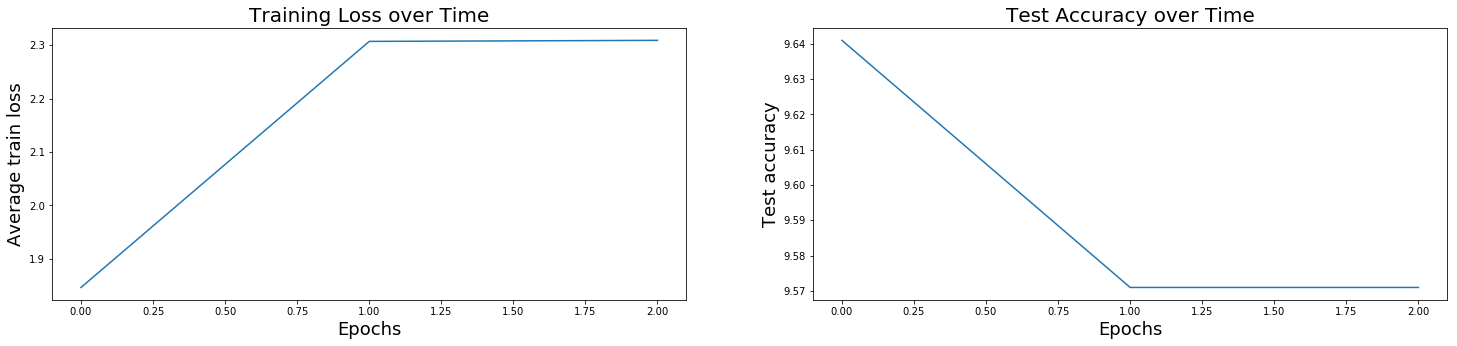

In [21]:
x_axis = np.arange(len(train_loss_over_time))

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(w=25,h=5)
ax[0].plot(x_axis, train_loss_over_time)
ax[0].set_xlabel('Epochs',fontsize=18)
ax[0].set_ylabel('Average train loss',fontsize=18)
ax[0].set_title('Training Loss over Time',fontsize=20)
ax[1].plot(x_axis, test_accuracy_over_time)
ax[1].set_xlabel('Epochs',fontsize=18)
ax[1].set_ylabel('Test accuracy',fontsize=18)
ax[1].set_title('Test Accuracy over Time',fontsize=20)
fig.savefig('mnist_stats.jpg')